In [1]:
#********************************
#TP3 : Support Vector Machine
#*******************************

#import necessaires
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import time



In [3]:

#charger le jeu de données MNIST
mnist=datasets.fetch_mldata('MNIST original')

#randomise Data et target
indices = np.random.randint(10000, size=10000)
data = mnist.data[indices]
target = mnist.target[indices]
#pour séparer le dataset en 2 échantillons de trainint et de test
# on veut un training set de 49000 (70% training set - 30 % test set)
xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=int(len(data)*0.7))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
#VARIATION DU KERNEL

ResScore =[]
ResPrecision = []
ResRecall = []
ResLoss = []
ResTimeTraining = []
ResTimePrediction = []

def runkernel (ker):
    # TRAIN
    clf = SVC(kernel=ker)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()
    # PREDIC
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()
    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    #Append
    ResScore.append(score*100)
    ResPrecision.append(precision*100)
    ResRecall.append(recall)
    ResLoss.append(loss01)
    ResTimePrediction.append(timePred)
    ResTimeTraining.append(timetrain)
    print("Ce modèle SVC avec un kernel", ker, "a un score de ", score*100, "%.")
    print("4eme image : prédiction ",predict[3], "reel : ", ytest[3])
    print ("précision :", precision*100)
    print ("recall  :",recall*100)
    print ("zero-one_loss :",recall*100)
    print( "training time :", timetrain)
    print( "prediction time :", timePred)
    print()
    
    
kern = ('linear', 'poly', 'rbf', 'sigmoid')
for j in kern:
    runkernel(j)


Ce modèle SVC avec un kernel linear a un score de  98.65 %.
4eme image : prédiction  1.0 reel :  1.0
précision : 98.48024959371733
recall  : 98.06660373595389
zero-one_loss : 98.06660373595389
training time : 11.777303218841553
prediction time : 5.67194676399231

Ce modèle SVC avec un kernel poly a un score de  99.55000000000001 %.
4eme image : prédiction  1.0 reel :  1.0
précision : 99.49319026190066
recall  : 99.21650462455344
zero-one_loss : 99.21650462455344
training time : 11.805451154708862
prediction time : 5.051867723464966

Ce modèle SVC avec un kernel rbf a un score de  67.28333333333333 %.
4eme image : prédiction  1.0 reel :  1.0
précision : 87.70050125313283
recall  : 62.58680008032337
zero-one_loss : 62.58680008032337
training time : 398.32543325424194
prediction time : 80.63821625709534

Ce modèle SVC avec un kernel sigmoid a un score de  33.78333333333333 %.
4eme image : prédiction  1.0 reel :  1.0
précision : 8.44864954984995
recall  : 25.0
zero-one_loss : 25.0
training

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
print(ResScore)
print(ResPrecision)
print(ResRecall)
print(ResLoss)
print(ResTimeTraining)
print(ResTimePrediction)

len(ResScore)

#DATA = 10000
#[99.93333333333332, 99.83333333333333, 79.36666666666666, 58.93333333333334]
#[99.94350282485875, 99.80972806826392, 87.03393380812736, 29.46666666666667]
#[0.9991883116883117, 0.9984629341246989, 0.7487824675324675, 0.5]
#[0.0006666666666667043, 0.0016666666666667052, 0.20633333333333337, 0.4106666666666666]
#[0.5844359397888184, 0.7659521102905273, 43.89463210105896, 40.67221403121948]
#[0.19448232650756836, 0.2892262935638428, 17.469238996505737, 16.382228136062622]

#DATA = 20000
#[98.65, 99.55000000000001, 67.28333333333333, 33.78333333333333]
#[98.48024959371733, 99.49319026190066, 87.70050125313283, 8.44864954984995]
#[0.980666037359539, 0.9921650462455344, 0.6258680008032337, 0.25]
#[0.013499999999999956, 0.0044999999999999485, 0.3271666666666667, 0.6621666666666667]
#[11.777303218841553, 11.805451154708862, 398.32543325424194, 267.7329707145691]
#[5.67194676399231, 5.051867723464966, 80.63821625709534, 88.08672642707825]

[98.65, 99.55000000000001, 67.28333333333333, 33.78333333333333]
[98.48024959371733, 99.49319026190066, 87.70050125313283, 8.44864954984995]
[0.980666037359539, 0.9921650462455344, 0.6258680008032337, 0.25]
[0.013499999999999956, 0.0044999999999999485, 0.3271666666666667, 0.6621666666666667]
[11.777303218841553, 11.805451154708862, 398.32543325424194, 267.7329707145691]
[5.67194676399231, 5.051867723464966, 80.63821625709534, 88.08672642707825]


4

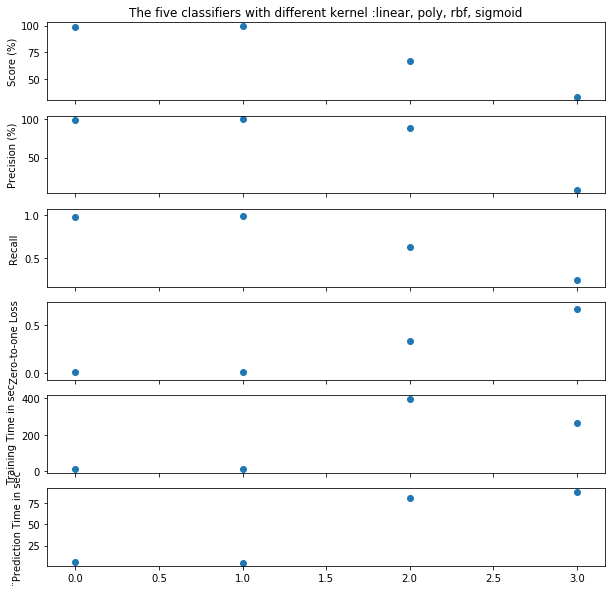

In [3]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].scatter(range(4), ResScore)
axarr[0].set_title('The five classifiers with different kernel :linear, poly, rbf, sigmoid')
axarr[0].set_ylabel('Score (%)')
axarr[1].scatter(range(4), ResPrecision)
axarr[1].set_ylabel('Precision (%)')
axarr[2].scatter(range(4), ResRecall)
axarr[2].set_ylabel('Recall ')
axarr[3].scatter(range(4), ResLoss)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].scatter(range(4), ResTimeTraining)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].scatter(range(4), ResTimePrediction)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

A priori, le kernel qui donne le meilleur score en moins de temps est le kernel 'poly'

In [ ]:
# VARIATION DU C (cost)


ResScore1 =[]
ResPrecision1 = []
ResRecall1 = []
ResLoss1 = []
ResTimeTraining1 = []
ResTimePrediction1 = []

def runCost (c):
    # TRAIN
    clf = SVC(kernel='poly', C=c)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()
    # PREDIC
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()
    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    #Append
    ResScore1.append(score*100)
    ResPrecision1.append(precision*100)
    ResRecall1.append(recall)
    ResLoss1.append(loss01)
    ResTimePrediction1.append(timePred)
    ResTimeTraining1.append(timetrain)
    print("Ce modèle SVC, kernel rbf et avec un cost ", c, "a un score de ", score*100, "%.")
    print("4eme image : prédiction ",predict[3], "reel : ", ytest[3])
    print ("précision :", precision*100)
    print ("recall  :",recall*100)
    print ("zero-one_loss :",recall*100)
    print( "training time :", timetrain)
    print( "prediction time :", timePred)
    print()
    

costs = np.logspace(-5,3,10)

for j in costs:
    runCost(j)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ce modèle SVC, kernel rbf et avec un alpha  1e-05 a un score de  60.4 %.
4eme image : prédiction  0.0 reel :  1.0
précision : 30.2
recall  : 50.0
zero-one_loss : 50.0
training time : 44.15860366821289
prediction time : 17.264405965805054

Ce modèle SVC, kernel rbf et avec un alpha  7.742636826811278e-05 a un score de  60.4 %.
4eme image : prédiction  0.0 reel :  1.0
précision : 30.2
recall  : 50.0
zero-one_loss : 50.0
training time : 44.85168504714966
prediction time : 17.39355969429016

Ce modèle SVC, kernel rbf et avec un alpha  0.0005994842503189409 a un score de  60.4 %.
4eme image : prédiction  0.0 reel :  1.0
précision : 30.2
recall  : 50.0
zero-one_loss : 50.0
training time : 46.45153450965881
prediction time : 19.462148427963257

Ce modèle SVC, kernel rbf et avec un alpha  0.004641588833612777 a un score de  60.4 %.
4eme image : prédiction  0.0 reel :  1.0
précision : 30.2
recall  : 50.0
zero-one_loss : 50.0
training time : 46.068819761276245
prediction time : 21.24218559265136

In [9]:
print(ResScore1)
print(ResPrecision1)
print(ResRecall1)
print(ResLoss1)
print(ResTimeTraining1)
print(ResTimePrediction1)

len(ResScore1)

# DATA = 20000
#[99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666]
#[99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513]
#[0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692]
#[0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333]
#[10.760218143463135, 10.6735200881958, 10.629627704620361, 10.624582052230835, 10.654501914978027, 10.737282037734985, 10.586721658706665, 10.567734241485596, 10.70935606956482, 11.364604711532593]
#[4.5169196128845215, 4.520910024642944, 4.618587970733643, 4.7104010581970215, 4.517915964126587, 4.627620697021484, 4.576722621917725, 4.583742141723633, 4.694443702697754, 4.51492166519165]


[99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666, 99.56666666666666]
[99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513, 99.44024719171513]
[0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692, 0.9914311088432692]
[0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333, 0.0043333333333333]
[10.760218143463135, 10.6735200881958, 10.629627704620361, 10.624582052230835, 10.654501914978027, 10.737282037734985, 10.586721658706665, 10.567734241485596, 10.70935606956482, 11.364604711532593]
[4.516919612884521

10

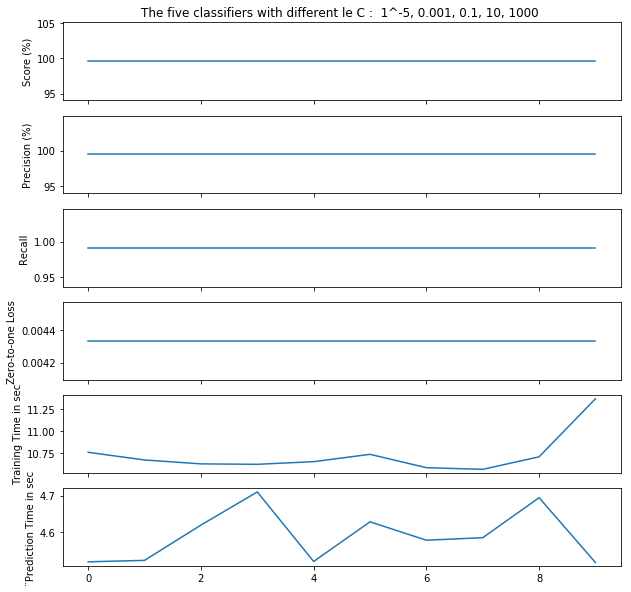

In [7]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(10), ResScore1)
axarr[0].set_title('The five classifiers with different le C :  1^-5, 0.001, 0.1, 10, 1000 ')
axarr[0].set_ylabel('Score (%)')
axarr[1].plot(range(10), ResPrecision1)
axarr[1].set_ylabel('Precision (%)')
axarr[2].plot(range(10), ResRecall1)
axarr[2].set_ylabel('Recall ')
axarr[3].plot(range(10), ResLoss1)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(10), ResTimeTraining1)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].plot(range(10), ResTimePrediction1)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

In [4]:
# VARIATION DU Gamma


ResScore2 =[]
ResPrecision2 = []
ResRecall2 = []
ResLoss2 = []
ResTimeTraining2 = []
ResTimePrediction2 = []

def runGamma(g):
    # TRAIN
    clf = SVC(kernel='poly', gamma=g)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()
    # PREDIC
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()
    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    #Append
    ResScore2.append(score*100)
    ResPrecision2.append(precision*100)
    ResRecall2.append(recall)
    ResLoss2.append(loss01)
    ResTimePrediction2.append(timePred)
    ResTimeTraining2.append(timetrain)
    print("Ce modèle SVC, kernel poly et avec un gamma ", g, "a un score de ", score*100, "%.")
    print("4eme image : prédiction ",predict[3], "reel : ", ytest[3])
    print ("précision :", precision*100)
    print ("recall  :",recall*100)
    print ("zero-one_loss :",recall*100)
    print( "training time :", timetrain)
    print( "prediction time :", timePred)
    print()
    

gammas = np.logspace(-5,3,10)

for j in gammas:
    runGamma(j)


Ce modèle SVC, kernel poly et avec un gamma  1e-05 a un score de  99.43333333333332 %.
4eme image : prédiction  2.0 reel :  2.0
précision : 99.36504550363445
recall  : 99.0383429116873
zero-one_loss : 99.0383429116873
training time : 10.841999530792236
prediction time : 4.590723037719727

Ce modèle SVC, kernel poly et avec un gamma  7.742636826811278e-05 a un score de  99.43333333333332 %.
4eme image : prédiction  2.0 reel :  2.0
précision : 99.36504550363445
recall  : 99.0383429116873
zero-one_loss : 99.0383429116873
training time : 10.757230043411255
prediction time : 4.619715929031372

Ce modèle SVC, kernel poly et avec un gamma  0.0005994842503189409 a un score de  99.43333333333332 %.
4eme image : prédiction  2.0 reel :  2.0
précision : 99.36504550363445
recall  : 99.0383429116873
zero-one_loss : 99.0383429116873
training time : 10.799173355102539
prediction time : 4.649505853652954

Ce modèle SVC, kernel poly et avec un gamma  0.004641588833612777 a un score de  99.43333333333332

In [8]:
print(ResScore2)
print(ResPrecision2)
print(ResRecall2)
print(ResLoss2)
print(ResTimeTraining2)
print(ResTimePrediction2)

len(ResScore2)



[99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332, 99.43333333333332]
[99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445, 99.36504550363445]
[0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729, 0.9903834291168729]
[0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709, 0.005666666666666709]
[10.841999530792236, 10.757230043411255, 10.799173355102539, 10.94073486328125, 10.825082778930664, 10.783157348632812, 10.728372573852539, 10.868925333023071, 10.842998266220093, 10.7642426490783

10

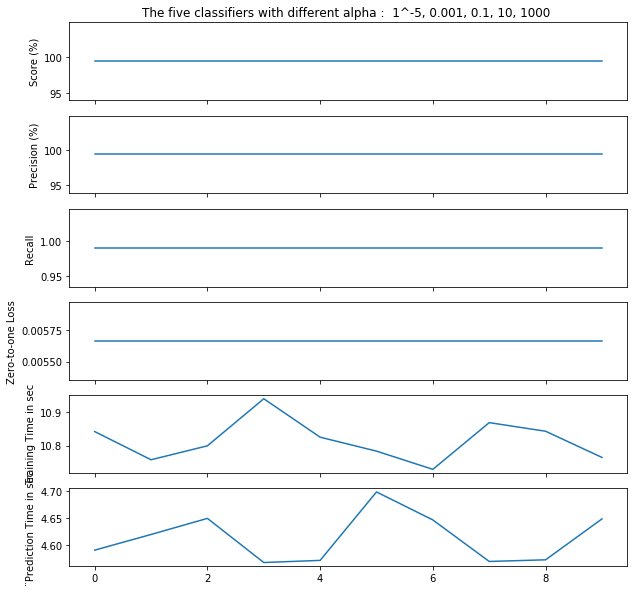

In [6]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(10), ResScore2)
axarr[0].set_title('The five classifiers with different alpha :  1^-5, 0.001, 0.1, 10, 1000 ')
axarr[0].set_ylabel('Score (%)')
axarr[1].plot(range(10), ResPrecision2)
axarr[1].set_ylabel('Precision (%)')
axarr[2].plot(range(10), ResRecall2)
axarr[2].set_ylabel('Recall ')
axarr[3].plot(range(10), ResLoss2)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(10), ResTimeTraining2)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].plot(range(10), ResTimePrediction2)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

In [4]:
# PARTIE AVEC GridSearchCV

paramGrid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ('linear', 'poly')
             }

grid = GridSearchCV(SVC(), paramGrid, cv=5)
grid = grid.fit(X=xtrain, y=ytrain)
print (grid.best_params_)

#The best param are : {'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'} for 10000 data

{'C': 0.001, 'gamma': 0.0001, 'kernel': 'linear'}


In [8]:
ResScore3 =[]
ResPrecision3 = []
ResRecall3 = []
ResLoss3 = []
ResTimeTraining3 = []
ResTimePrediction3 = []

for i in (10000,20000,30000,40000,50000):
    #DATA
    #randomise Data et target
    indices = np.random.randint(i, size=i)
    data = mnist.data[indices]
    target = mnist.target[indices]
    #pour séparer le dataset en 2 échantillons de trainint et de test
    # on veut un training set de 49000 (70% training set - 30 % test set)
    xtrain, xtest, ytrain, ytest =train_test_split(data, target, train_size=int(len(data)*0.7))
    # TRAIN
    clf = SVC(kernel='linear', C=0.0001, gamma=0.0001)
    startTrain =time.time()
    clf.fit(xtrain, ytrain)
    endTrain = time.time()
    # PREDIC
    startpred= time.time()
    predict = clf.predict(xtest)
    endpred = time.time()
    # METRICS
    score = clf.score(xtest,ytest)
    recall = metrics.recall_score(ytest, predict, average ='macro')
    precision = metrics.precision_score(ytest, predict,  average='macro')
    loss01 = metrics.zero_one_loss(ytest, predict)
    cm = metrics.confusion_matrix(ytest, predict)
    timetrain = endTrain - startTrain
    timePred = endpred - startpred
    #Append
    ResScore3.append(score*100)
    ResPrecision3.append(precision*100)
    ResRecall3.append(recall)
    ResLoss3.append(loss01)
    ResTimePrediction3.append(timePred)
    ResTimeTraining3.append(timetrain)
    print("Ce modèle SVC a un score de ", score*100, "%.")
    print("4eme image : prédiction ",predict[3], "reel : ", ytest[3])
    print ("précision :", precision*100)
    print ("recall  :",recall*100)
    print ("zero-one_loss :",recall*100)
    print( "training time :", timetrain)
    print( "prediction time :", timePred)
    print(cm)
    print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Ce modèle SVC a un score de  100.0 %.
4eme image : prédiction  1.0 reel :  1.0
précision : 100.0
recall  : 100.0
zero-one_loss : 100.0
training time : 0.515620231628418
prediction time : 0.17154264450073242
[[1811    0]
 [   0 1189]]

Ce modèle SVC a un score de  98.78333333333333 %.
4eme image : prédiction  2.0 reel :  2.0
précision : 98.26645966621453
recall  : 98.15976111583802
zero-one_loss : 98.15976111583802
training time : 10.712334632873535
prediction time : 5.205078363418579
[[1799    0    9    0]
 [   0 1975    6    3]
 [  14   12 1776   12]
 [   2    8    7  377]]

Ce modèle SVC a un score de  97.91111111111111 %.
4eme image : prédiction  1.0 reel :  1.0
précision : 97.89619213892078
recall  : 97.86419354804686
zero-one_loss : 97.86419354804686
training time : 36.050238609313965
prediction time : 17.55972146987915
[[1820    0    6    2    1]
 [   2 2033    2    2    4]
 [  15   23 1656   22   19]
 [   9   12   42 1773    2]
 [   8    1   13    3 1530]]

Ce modèle SVC a un sc

In [9]:
print(ResScore3)
print(ResPrecision3)
print(ResRecall3)
print(ResLoss3)
print(ResTimeTraining3)
print(ResTimePrediction3)

len(ResScore3)

[100.0, 98.78333333333333, 97.91111111111111, 96.86666666666667, 96.24000000000001]
[100.0, 98.26645966621453, 97.89619213892078, 96.83668437068877, 95.87137103413406]
[1.0, 0.9815976111583802, 0.9786419354804685, 0.9676532858368236, 0.9567369848826522]
[0.0, 0.012166666666666659, 0.020888888888888846, 0.031333333333333324, 0.03759999999999997]
[0.515620231628418, 10.712334632873535, 36.050238609313965, 85.01860284805298, 133.73120546340942]
[0.17154264450073242, 5.205078363418579, 17.55972146987915, 48.323750019073486, 85.28189873695374]


5

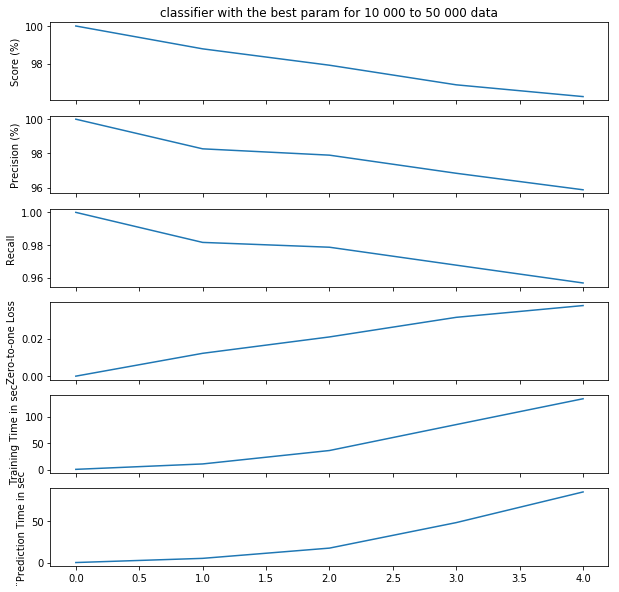

In [13]:
fig, axarr = plt.subplots(6, sharex=True, figsize=(10,10))
axarr[0].plot(range(5), ResScore3)
axarr[0].set_title('classifier with the best param for 10 000 to 50 000 data')
axarr[0].set_ylabel('Score (%)')
axarr[1].plot(range(5), ResPrecision3)
axarr[1].set_ylabel('Precision (%)')
axarr[2].plot(range(5), ResRecall3)
axarr[2].set_ylabel('Recall ')
axarr[3].plot(range(5), ResLoss3)
axarr[3].set_ylabel('Zero-to-one Loss')
axarr[4].plot(range(5), ResTimeTraining3)
axarr[4].set_ylabel('Training Time in sec')
axarr[5].plot(range(5), ResTimePrediction3)
axarr[5].set_ylabel('¨Prediction Time in sec')

plt.show()

In [ ]:
#Refaire les tests avec la database panda (diabète chez les femmes)
# CHanger les titres des graphes